## Analisis de la Tasa de Homicidios en EEUU

In [2]:
# importamos librerias
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

### 1. Asignamos una apariencia general a los graficos

In [5]:
# muestra los graficos y los guarda en el Notebooks
%matplotlib inline

sns.set_style(style='whitegrid') #parametros del estilo general de los graficos
sns.set_context(context='notebook') #parametros de escala de los elementos del grafico
plt.rcParams['figure.figsize'] = (11, 9.4) #personaliza las propiedades y estilos de los graficos de matplotlib


### 2. Cargar Datos

In [6]:
state = pd.read_csv('state.csv')
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### 3. Tipos de datos de cada variable

In [7]:
state.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

Tanto states como Abbreviation son de datos categoricos de tipo string. Population es de tipo entero y Murder.Rate is numerico

### 4. Cantidad de variables de cada tipo de dato

In [9]:
(
    state
    .dtypes
    .value_counts()
)

object     2
int64      1
float64    1
dtype: int64

### 5. Cantidad de variables y registros en el dataset

In [10]:
state.shape

(50, 4)

### 6. Valores nulos en las variables

In [12]:
(
    state
    .isnull() # identifica los valores nulos
    .any()    # cuenta los valores dados por columna
)

State           False
Population      False
Murder.Rate     False
Abbreviation    False
dtype: bool

Claramente vemos que el dataset no posee valores nulos

### 7. Estadistica descriptiva de las variables categoricas 

In [15]:
state.describe(include='object') # estadistica descriptiva de los datos categoricos

,State,Abbreviation
count,50,50
unique,50,50
top,Alabama,AL
freq,1,1


### 8. Convertir las variables de tipo object en tipo category

In [17]:
(
    state
    .astype({
        'State':'category',
        'Abbreviation':'category'
    })
)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### 9. Estadistica descriptiva de las variables numerica

In [18]:
state.describe(include=[np.number]) 

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


### 10. Visualizar la poblacion por cada estado 

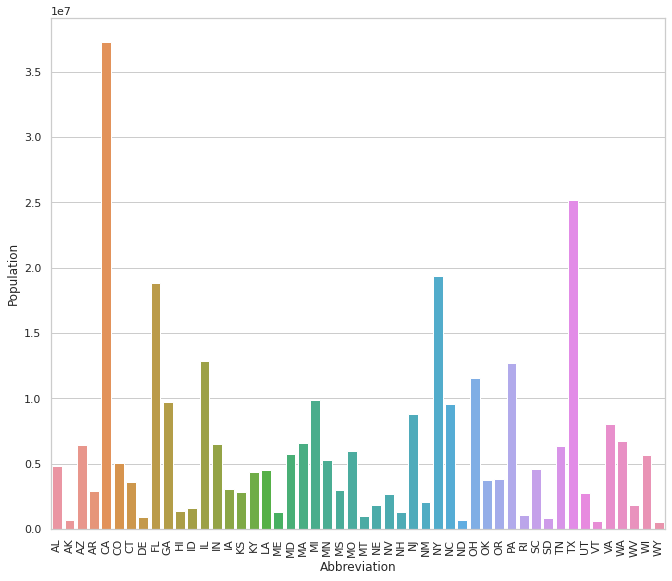

In [27]:
ax = sns.barplot(
    data=state,
    x='Abbreviation',
    y= 'Population'
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90
)

plt.show()